# <center>**Box plot**</center>

**Box plot**

- use to find the outliers.

- outlier is an observation having huge postive value or huge negative value.

- Q1(lowest value)=25p, Q2(middl evalue) =50p, Q3(higest value) =75p

- IQR(Inter Quartile Range) = Q3(higest value) - Q1(lowest value)

- Q3+1.5 * IQR and Q-1.5 * IQR

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os

In [2]:
visa_df=pd.read_csv(r"C:\Users\Admin\Documents\naresh IT\EDA(EXPOLRETREE DATA  ANALYSIS)\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
cat_col=visa_df.select_dtypes(include='object').columns
num_col=visa_df.select_dtypes(exclude='object').columns
num_col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [4]:
#Rread prevailing_wage data and plot box plot

wage_data=visa_df['prevailing_wage']


        Q1-1.5IQR*Q1      median         Q3 * Q3+1.5IQR
                    
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR*


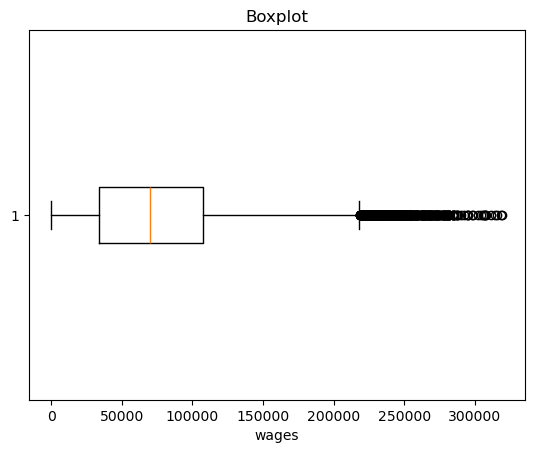

In [5]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

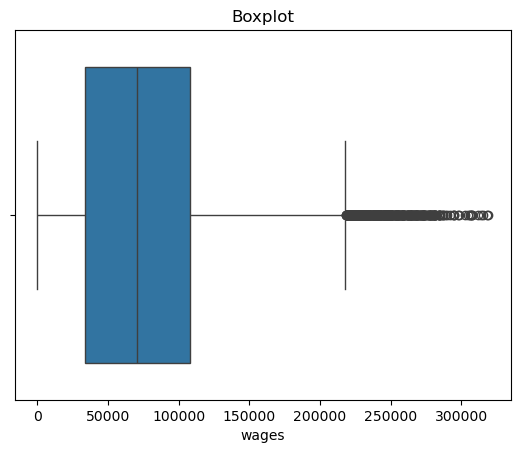

In [6]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

**Plot the histogram and box plot side by side**

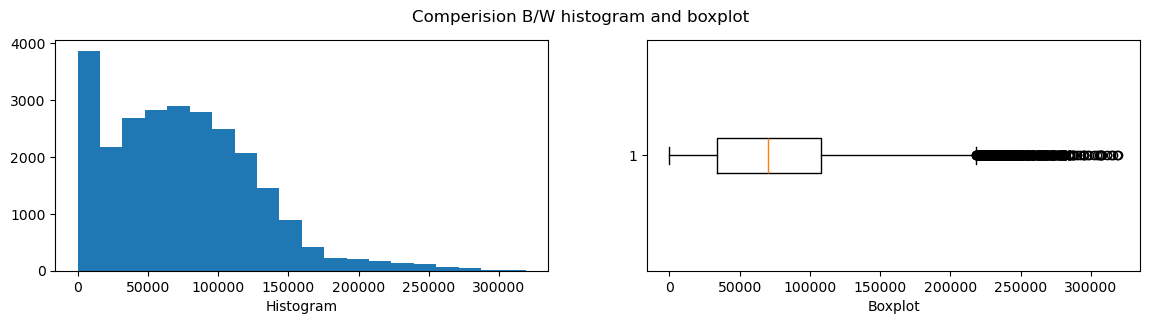

In [7]:
# plt.figure(figsize=(10,5))
plt.figure(figsize=(14,3))
plt.suptitle('Comperision B/W histogram and boxplot') # providing main title
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'],bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'],vert=False)
plt.xlabel('Boxplot')
plt.show()

# <center>**Finding the outliers** </center>

- Outliers available B/W lessthen Q1-1.5 * IQR and greter then Q3+1.5 * IQR

- step1: calculate

    - Q1=25p 
    
    - Q2=50p
    
    - Q3=75p

- step2: calculate IQR = Q3-Q1

- step3: calculate:

    - LB = Q1-1.5*IQR 

    - UB = Q3+1.5*IQR

- step4:

    - con1 = wage_data < LB 
            
    - con2 = wage_data>UB
 
    - con3 = con1 bitwise OR "|" con2
 
- step5: data[con3]

In [8]:
# STEP-1
wage_data=visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)

#step-2
iqr=q3-q1

#step-3
lb=q1-1.5*iqr
ub=q3+1.5*iqr

#step4
con1=wage_data<lb
con2=wage_data>ub
con3=con1|con2 # it is a bitwise or oprator,use only for binary opration
# con1 and con 2 will return true or false, 
# when result true and false then use bitwise or
outleir_data=wage_data[con3]
print(outleir_data) 
len(outleir_data)

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64


427

## <center>**Outleir DataFrame**</center>

In [9]:
outleir_df=visa_df[con3]
outleir_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


## <center>**Non-Outleir Data**</center>

- Fallow same process as outlrir but oposit manner

In [10]:
con4=wage_data>=lb
con5=wage_data<=ub
con6=con4&con5
non_out_data=wage_data[con6]
non_out_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

## <center>**Non Outleir DataFrame**</center>

In [11]:
non_outleir_df=visa_df[con6]
non_outleir_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- we have two dataframe

- visa_df: Total data 25480

- non_outleir_df= after removing outleirs 25053

- lets plot non_outleir data previaling_wage and boxplot

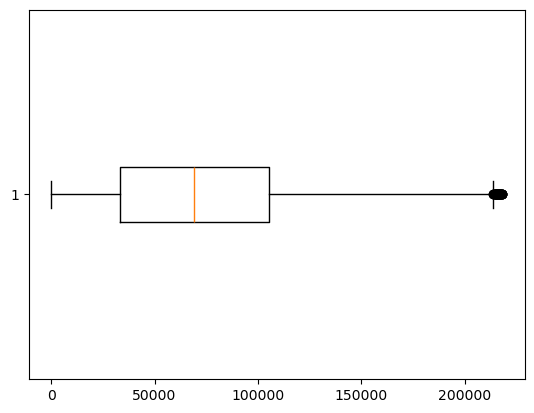

In [12]:
wage_data_non_outleirs=non_outleir_df['prevailing_wage']
plt.boxplot(wage_data_non_outleirs,vert=False)
plt.show()

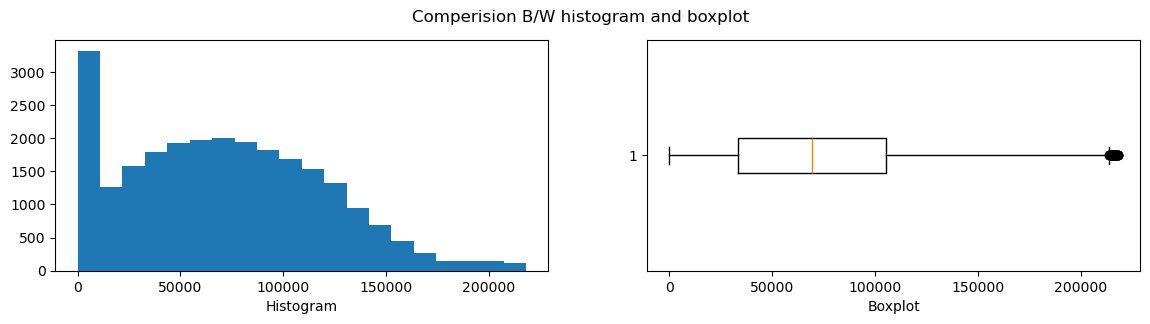

In [13]:
# plt.figure(figsize=(10,5))
plt.figure(figsize=(14,3))
plt.suptitle('Comperision B/W histogram and boxplot') # providing main title
plt.subplot(1,2,1).hist(wage_data_non_outleirs,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data_non_outleirs,vert=False)
plt.xlabel('Boxplot')
plt.show()

## <center>**Compair all(With outleir and without outleir)**</center>

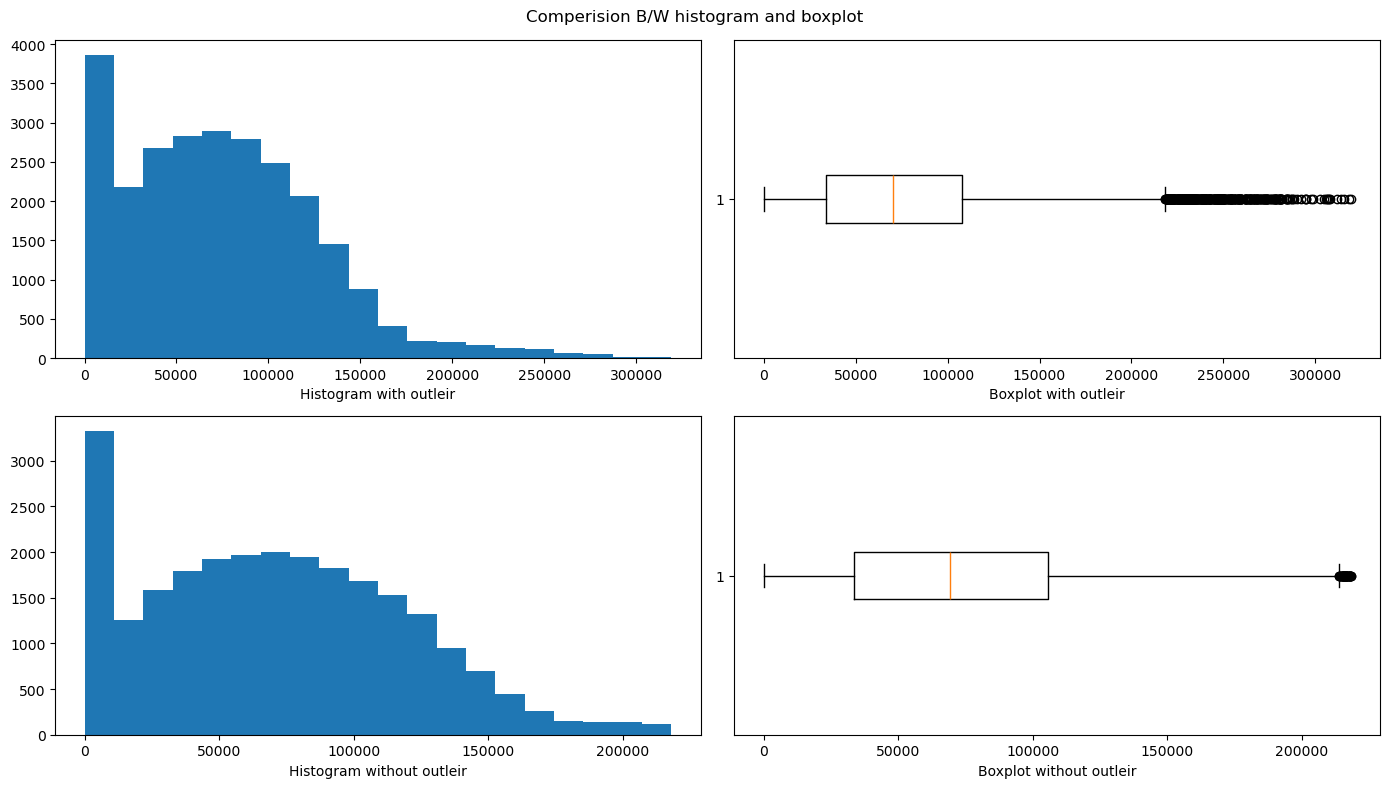

In [14]:
plt.figure(figsize=(14,8))
####################### with outleir ######################
plt.suptitle('Comperision B/W histogram and boxplot') # providing main title
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=20)
plt.xlabel('Histogram with outleir')
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'],vert=False)
plt.xlabel('Boxplot with outleir')

########################## Without outleir ##########################
plt.subplot(2,2,3).hist(wage_data_non_outleirs,bins=20)
plt.xlabel('Histogram without outleir')
plt.subplot(2,2,4).boxplot(wage_data_non_outleirs,vert=False)
plt.xlabel('Boxplot without outleir')
plt.tight_layout()
plt.show()

In [15]:
# Fill the outleirs of wage data with wage meduan(median does,not edffect outleirs)
# 427 outleirs will be replace with median
# again draw the plotb

# <center> **Class-65** </center>

In [16]:
# import the packeges
# read the data
# cat-num 
# find outleir

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
visa_df=pd.read_csv(r"C:\Users\Admin\Documents\naresh IT\EDA(EXPOLRETREE DATA  ANALYSIS)\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [19]:
cat_cols=visa_df.select_dtypes(include='object').columns
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

## <center> **Find ouitleirs**</center>

In [20]:
wage_data=visa_df['prevailing_wage']

- Outliers available B/W lessthen Q1-1.5 * IQR and greter then Q3+1.5 * IQR

- step1: calculate

    - Q1=25p 
    
    - Q2=50p
    
    - Q3=75p

- step2: calculate IQR = Q3-Q1

- step3: calculate:

    - LB = Q1-1.5*IQR 

    - UB = Q3+1.3*IQR

- step4:

    - con1 = wage_data < LB 
            
    - con2 = wage_data>UB
 
    - con3 = con1 bitwise OR "|" con2
 
- step5: data[con3]

In [21]:
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
con1=wage_data<lb
con2=wage_data>ub
con3=con1|con2
old=wage_data[con3]
oldf=visa_df[con3]
oldf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


## <center>**Non outleir dataframe**</center>

In [22]:
con4=wage_data>lb
con5=wage_data<ub
con6=con4&con5
nod=wage_data[con6]
nodf=visa_df[con6]
nodf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


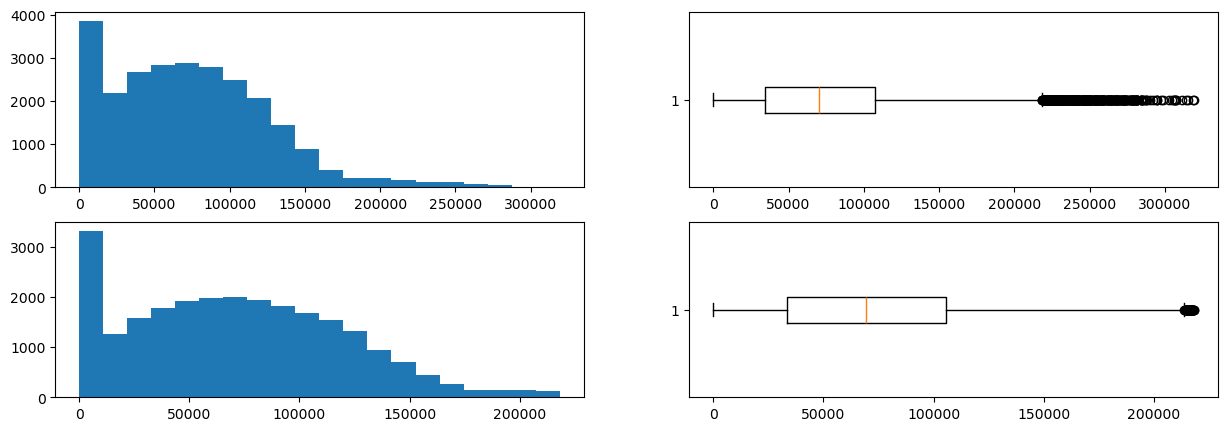

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1).hist(wage_data,bins=20)
plt.subplot(2,2,2).boxplot(wage_data,vert=False)
plt.subplot(2,2,3).hist(nod,bins=20)
plt.subplot(2,2,4).boxplot(nod,vert=False)
plt.show()

## Comperision B/W OLD and NOD

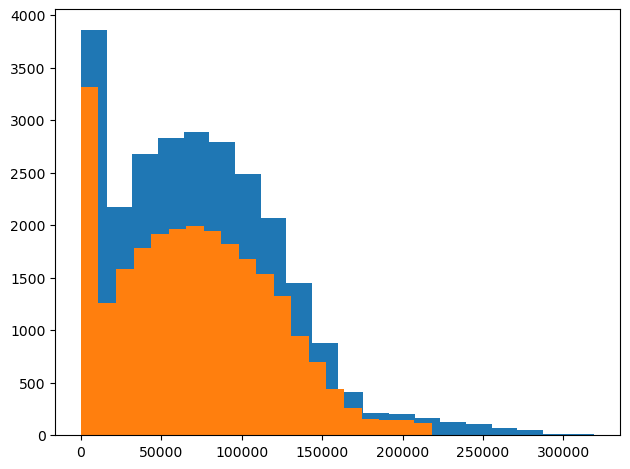

In [28]:
# plt.figure(figsize=(8,5))
plt.hist(wage_data,bins=20) # blue color= with outlaie
plt.hist(nod,bins=20) # orange color=without outleir
plt.tight_layout()
plt.show()

## <center>**How to deal with outliers**</center>

- 1. We can **drop the outlierrs(OL)**, but not recommended
 
      - Droping OL means delete row, whic drop other columns values also, some imp info might loose.
    
      - in IT if OL is < 2% of the total data then we can drop OL.
    
      - We have 427 OL over 25480 rows = 1.67% OL
    
- 2. **Fill wth medain**,cos OL doesn't effact median.
 
      -  So it is best to fill OL with median.
    
- 3. **Capping or Flowring**
     
    - OL < LB filled with LB
 
    - OL > UB filled with UB

- 4. **Isolatyion Forest**

     - ML model use to find OL

## <center>**Filled with median value**</center>

In [39]:
lst1=[]
for i in wage_data:
    if i<lb or i>ub:# OL find
        median=wage_data.median()# find median
        lst1.append(median)# filled with median
    else:
        lst1.append(i)# filled normal value if not OL
oldf=pd.DataFrame(lst1,columns=['prevaling_wage'])
oldf

,prevaling_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,70308.2100
25477,146298.8500
25478,86154.7700


**np.Where**

- In numpy we have a method called np.where

- it takes 3 arguiment

    1. Condition
 
    2. Value if con is True
 
    3. value if con is False
 
- it is applicable only for binary condition (true and fals).

In [63]:
dict1={'sub':['DS','DE','CS'],
    'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,DS,100
1,DE,200
2,CS,300


In [44]:
# Q) replace marks, which are > 100

In [65]:
dict1={'sub':['DS','DE','CS'],
    'marks':[100,200,300]}
df1=pd.DataFrame(dict1)
l=[]
for i in df1.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df1['marks']=l
df1

,sub,marks
0,DS,100
1,DE,1
2,CS,1


In [66]:
dict1={'sub':['DS','DE','CS'],
    'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,DS,100
1,DE,200
2,CS,300


In [69]:
con=df['marks']>100
l=np.where (con,1,df['marks'])
df['marks']=l
df

,sub,marks
0,DS,100
1,DE,1
2,CS,1


## <center> **Fill outliers with median using np.where method** </where>

In [75]:
wage_data=visa_df['prevailing_wage']
con1=wage_data<lb
con2=wage_data>ub
con3=con1|con2k
l1=np.where(con3,wage_data.median(),wage_data)
pd.DataFrame(l1,columns=['previaling_wage_where'])

,previaling_wage_where
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,70308.2100
25477,146298.8500
25478,86154.7700


In [84]:
# now we will replace OL on dataframe
visa_df['prevailing_wage_update']=l1
visa_df.to_csv('visa_df1.csv',index=False) # make a new dataset with outleir replaced
visa_df.tail(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_update
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified,516.4101
25471,EZYV25472,Asia,High School,N,N,40224,1962,Island,75587.4200,Year,Y,Certified,75587.4200
25472,EZYV25473,Asia,High School,N,N,1346,2003,Midwest,76155.6000,Year,N,Certified,76155.6000
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified,22845.5600
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified,51104.7800
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,70308.2100
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.9100,Year,Y,Certified,70876.9100


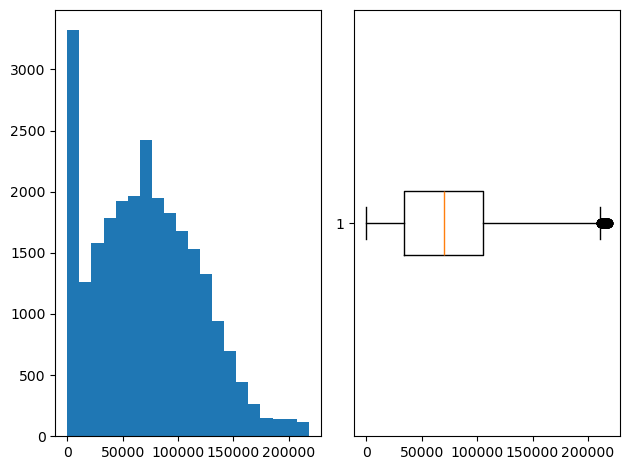

In [80]:
# now we will make histogram and boxplot to check outlier removed or not

plt.subplot(1,2,1).hist(visa_df['prevailing_wage_update'],bins=20)
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage_update'],vert=False)
plt.tight_layout()